# analysis.ipynb
**Author:** Khoi Nguyen

**Date created:** 03/06/2023

**Last modified:** 05/12/2023

**Description:** This notebook analyzes and visualizes the data of the semantic scores which were obtained from semantically comparing datasets of sentences between datasets of the `ada`, `1k_ada`, `10k_ada`, `100k_ada`, and `Curie` models.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

### ada
Stats on `ada`

In [29]:
# Read in CSV
df = pd.read_csv('results/semantic_score_ada.csv')

In [30]:
# Calculate the mean, median, and mode of the semantic scores
mean = df['semantic_score'].mean()
median = df['semantic_score'].median()
mode = df['semantic_score'].mode()[0]

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 0.7898573937118053
Median: 0.8104642033576965
Mode: 0.0744598507881164


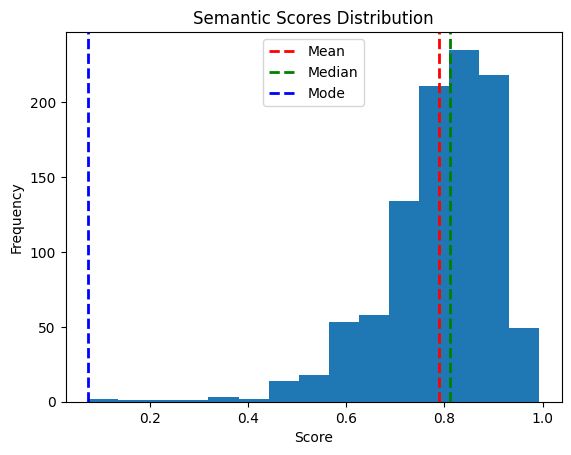

In [31]:
# Visualize the above statistics and the variance
plt.hist(df['semantic_score'], bins = 15)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode, color='b', linestyle='dashed', linewidth=2, label='Mode')
plt.title('Semantic Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [32]:
# Calculate the percentage of sentences with a semantic score greater than 0.5
total_sentences = df.shape[0]
above_half_sentences = df[df['semantic_score'] > 0.5].shape[0]

percentage_above_half = (above_half_sentences / total_sentences) * 100

print("Percentage of sentences with a score greater than 0.5:", percentage_above_half)

Percentage of sentences with a score greater than 0.5: 97.6


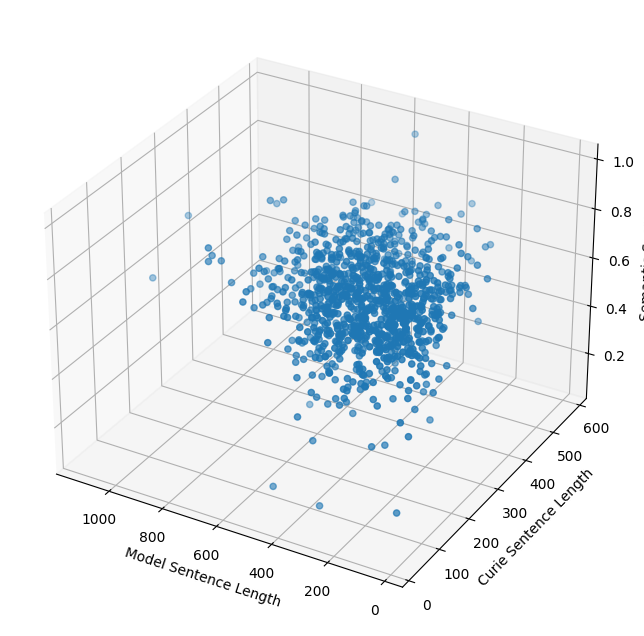

In [33]:
# Create 3D scatter plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['model_sentence'].str.len(), df['curie_sentence'].str.len(), df['semantic_score'])
ax.set_xlabel('Model Sentence Length')
ax.set_ylabel('Curie Sentence Length')
ax.set_zlabel('Semantic Score')
ax.invert_xaxis()
plt.show()

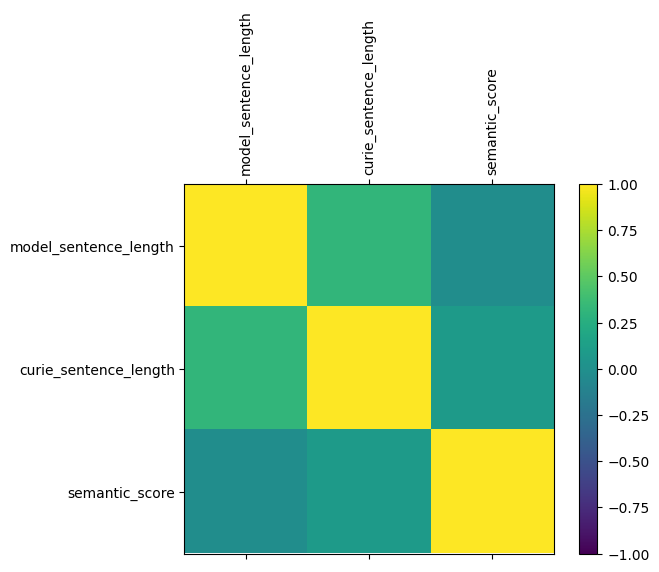

In [34]:
# Create new column for sentence length
df['model_sentence_length'] = df['model_sentence'].str.len()
df['curie_sentence_length'] = df['curie_sentence'].str.len()

# Calculate correlations
corr_matrix = df[['model_sentence_length', 'curie_sentence_length', 'semantic_score']].corr()

# Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['model_sentence_length', 'curie_sentence_length', 'semantic_score'], rotation=90)
ax.set_yticklabels(['model_sentence_length', 'curie_sentence_length', 'semantic_score'])
plt.show()

### 1k_ada
Stats on `1k_ada`

### 10k_ada
Stats on `10k_ada`

### 100k_ada
Stats on `100k_ada`

### Overall Stats
Stats on everything! Specifically, answer the question on *“fine-tuning Ada with x examples results in performance y% of Davinci and costs z% of it”*.

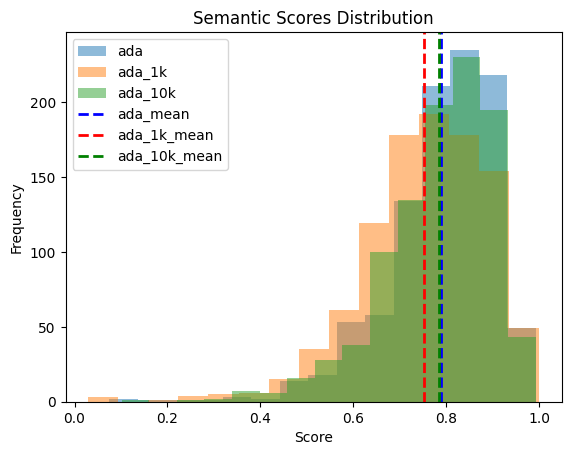

In [36]:
# Open results/semantic_score_ada.csv, results/semantic_score_1k_ada.csv, results/semantic_score_10k_ada.csv
ada = pd.read_csv('results/semantic_score_ada.csv')
ada_1k = pd.read_csv('results/semantic_score_1k_ada.csv')
ada_10k = pd.read_csv('results/semantic_score_10k_ada.csv')

# Create distribution graph with means
plt.hist(ada['semantic_score'], bins = 15, alpha=0.5, label='ada')
plt.hist(ada_1k['semantic_score'], bins = 15, alpha=0.5, label='ada_1k')
plt.hist(ada_10k['semantic_score'], bins = 15, alpha=0.5, label='ada_10k')
plt.axvline(ada['semantic_score'].mean(), color='b', linestyle='dashed', linewidth=2, label='ada_mean')
plt.axvline(ada_1k['semantic_score'].mean(), color='r', linestyle='dashed', linewidth=2, label='ada_1k_mean')
plt.axvline(ada_10k['semantic_score'].mean(), color='g', linestyle='dashed', linewidth=2, label='ada_10k_mean')
plt.title('Semantic Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [76]:
# Print the average scores
print("ada_mean:", ada['semantic_score'].mean())
print("ada_1k_mean:", ada_1k['semantic_score'].mean())
print("ada_10k_mean:", ada_10k['semantic_score'].mean())

ada_mean: 0.7898573937118053
ada_1k_mean: 0.7528480275329202
ada_10k_mean: 0.7842051781192422


In [48]:
# Open costs.csv
ada_fixed_costs = pd.read_csv('costs.csv')

# Display as table
ada_fixed_costs

# Print the columns
ada_fixed_costs.columns

Index(['cost_type', 'ada', '1k_ada', '10k_ada', '100k_ada'], dtype='object')

In [49]:
# Compute the sum of each column (i.e., the total cost for each model)
ada_fixed_cost = ada_fixed_costs['ada'].sum()
ada_1k_fixed_cost = ada_fixed_costs['1k_ada'].sum()
ada_10k_fixed_cost = ada_fixed_costs['10k_ada'].sum()
ada_100k_fixed_cost = ada_fixed_costs['100k_ada'].sum()

print(f"Ada fixed cost: {ada_fixed_cost}")
print(f"Ada 1k fixed cost: {ada_1k_fixed_cost}")
print(f"Ada 10k fixed cost: {ada_10k_fixed_cost}")
print(f"Ada 100k fixed cost: {ada_100k_fixed_cost}")

Ada fixed cost: 7
Ada 1k fixed cost: 7.43
Ada 10k fixed cost: 9.780000000000001
Ada 100k fixed cost: 7


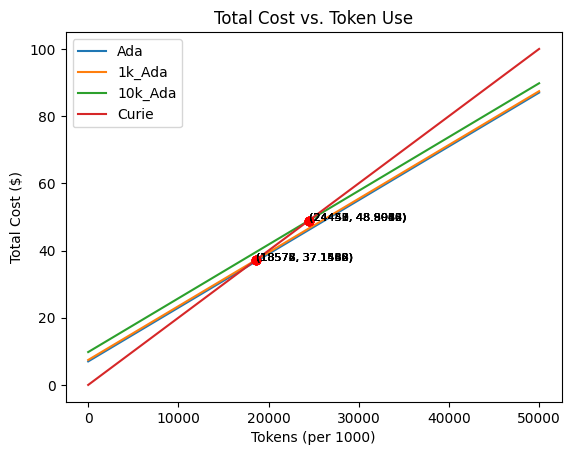

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# set the usage costs per 1000 tokens
ada_usage_cost = 0.0016
curie_usage_cost = 0.0020

# set the fixed costs
ada_fixed_cost = ada_fixed_costs['ada'].sum()
ada_1k_fixed_cost = ada_fixed_costs['1k_ada'].sum()
ada_10k_fixed_cost = ada_fixed_costs['10k_ada'].sum()

# let's say we want to calculate for up to 50000 tokens
tokens = np.array(range(0, 50001, 1))

# calculate the total cost for each model at each token level
ada_total_cost = ada_fixed_cost + ada_usage_cost * tokens
ada_1k_total_cost = ada_1k_fixed_cost + ada_usage_cost * tokens
ada_10k_total_cost = ada_10k_fixed_cost + ada_usage_cost * tokens
curie_total_cost = curie_usage_cost * tokens

# plot the cost vs tokens for each model
plt.plot(tokens, ada_total_cost, label='Ada')
plt.plot(tokens, ada_1k_total_cost, label='1k_Ada')
plt.plot(tokens, ada_10k_total_cost, label='10k_Ada')
plt.plot(tokens, curie_total_cost, label='Curie')

# mark the intersection points and add text
idx_1k_curie = np.where(np.isclose(ada_1k_total_cost, curie_total_cost, atol=0.001))[0]
if len(idx_1k_curie) > 0:  # make sure there is an intersection
    plt.plot(tokens[idx_1k_curie], ada_1k_total_cost[idx_1k_curie], 'ro')
    for idx in idx_1k_curie:
        plt.text(tokens[idx], ada_1k_total_cost[idx], f'({tokens[idx]}, {ada_1k_total_cost[idx]:.4f})',
                 fontsize=8, weight='light')  # lighter, smaller font

idx_10k_curie = np.where(np.isclose(ada_10k_total_cost, curie_total_cost, atol=0.001))[0]
if len(idx_10k_curie) > 0:  # make sure there is an intersection
    plt.plot(tokens[idx_10k_curie], ada_10k_total_cost[idx_10k_curie], 'ro')
    for idx in idx_10k_curie:
        plt.text(tokens[idx], ada_10k_total_cost[idx], f'({tokens[idx]}, {ada_10k_total_cost[idx]:.4f})',
                 fontsize=8, weight='light')  # lighter, smaller font

# add legend and labels
plt.legend()
plt.xlabel('Tokens (per 1000)')
plt.ylabel('Total Cost ($)')
plt.title('Total Cost vs. Token Use')

# show the plot
plt.show()


In [75]:
import pandas as pd

# set the usage costs per 1000 tokens
ada_usage_cost = 0.0016
curie_usage_cost = 0.0020

# set the fixed costs
ada_fixed_cost = ada_fixed_costs['ada'].sum()
ada_1k_fixed_cost = ada_fixed_costs['1k_ada'].sum()
ada_10k_fixed_cost = ada_fixed_costs['10k_ada'].sum()

# calculate for up to 50000 tokens, but now with steps of 0.01
tokens = np.arange(0, 50001, 1)

# calculate the total cost for each model at each token level
ada_total_cost = ada_fixed_cost + ada_usage_cost * tokens
ada_1k_total_cost = ada_1k_fixed_cost + ada_usage_cost * tokens
ada_10k_total_cost = ada_10k_fixed_cost + ada_usage_cost * tokens
curie_total_cost = curie_usage_cost * tokens

# Initialize a list to store intersection points
intersections = []

# Calculate intersections and add them to the list
idx = np.where(np.isclose(ada_total_cost, curie_total_cost, atol=0.001))[0]
for i in idx:
    intersections.append(('Ada', tokens[i], ada_total_cost[i]))

idx_1k = np.where(np.isclose(ada_1k_total_cost, curie_total_cost, atol=0.001))[0]
for i in idx_1k:
    intersections.append(('1k_Ada', tokens[i], ada_1k_total_cost[i]))

idx_10k = np.where(np.isclose(ada_10k_total_cost, curie_total_cost, atol=0.001))[0]
for i in idx_10k:
    intersections.append(('10k_Ada', tokens[i], ada_10k_total_cost[i]))

# Convert the list to a DataFrame and display
df_intersections = pd.DataFrame(intersections, columns=['Model', 'Tokens', 'Total Cost'])
print(df_intersections)


      Model  Tokens  Total Cost
0       Ada   17497     34.9952
1       Ada   17498     34.9968
2       Ada   17499     34.9984
3       Ada   17500     35.0000
4       Ada   17501     35.0016
5       Ada   17502     35.0032
6       Ada   17503     35.0048
7    1k_Ada   18572     37.1452
8    1k_Ada   18573     37.1468
9    1k_Ada   18574     37.1484
10   1k_Ada   18575     37.1500
11   1k_Ada   18576     37.1516
12   1k_Ada   18577     37.1532
13   1k_Ada   18578     37.1548
14  10k_Ada   24447     48.8952
15  10k_Ada   24448     48.8968
16  10k_Ada   24449     48.8984
17  10k_Ada   24450     48.9000
18  10k_Ada   24451     48.9016
19  10k_Ada   24452     48.9032
20  10k_Ada   24453     48.9048
